# Deep Learning First Assignement 
Pierre Ntoh Song

Master Data Sciences & Business Analytics

### Code to generate the figures

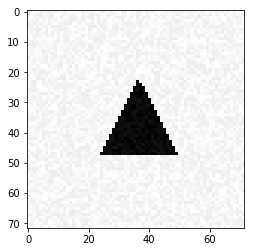

In [283]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# On some implementations of matplotlib, you may need to change this value
IMAGE_SIZE = 72

def generate_a_drawing(figsize, U, V, noise=0.0):
    fig = plt.figure(figsize=(figsize,figsize))
    ax = plt.subplot(111)
    plt.axis('Off')
    ax.set_xlim(0,figsize)
    ax.set_ylim(0,figsize)
    ax.fill(U, V, "k")
    fig.canvas.draw()
    imdata = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)[::3].astype(np.float32)
    imdata = imdata + noise * np.random.random(imdata.size)
    plt.close(fig)
    return imdata

def generate_a_rectangle(noise=0.0, free_location=False):
    figsize = 1.0    
    U = np.zeros(4)
    V = np.zeros(4)
    if free_location:
        corners = np.random.random(4)
        top = max(corners[0], corners[1])
        bottom = min(corners[0], corners[1])
        left = min(corners[2], corners[3])
        right = max(corners[2], corners[3])
    else:
        side = (0.3 + 0.7 * np.random.random()) * figsize
        top = figsize/2 + side/2
        bottom = figsize/2 - side/2
        left = bottom
        right = top
    U[0] = U[1] = top
    U[2] = U[3] = bottom
    V[0] = V[3] = left
    V[1] = V[2] = right
    return generate_a_drawing(figsize, U, V, noise)


def generate_a_disk(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        center = np.random.random(2)
    else:
        center = (figsize/2, figsize/2)
    radius = (0.3 + 0.7 * np.random.random()) * figsize/2
    N = 50
    U = np.zeros(N)
    V = np.zeros(N)
    i = 0
    for t in np.linspace(0, 2*np.pi, N):
        U[i] = center[0] + np.cos(t) * radius
        V[i] = center[1] + np.sin(t) * radius
        i = i + 1
    return generate_a_drawing(figsize, U, V, noise)

def generate_a_triangle(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        U = np.random.random(3)
        V = np.random.random(3)
    else:
        size = (0.3 + 0.7 * np.random.random())*figsize/2
        middle = figsize/2
        U = (middle, middle+size, middle-size)
        V = (middle+size, middle-size, middle-size)
    imdata = generate_a_drawing(figsize, U, V, noise)
    return [imdata, [U[0], V[0], U[1], V[1], U[2], V[2]]]


im = generate_a_rectangle(10, True)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

im = generate_a_disk(10)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

[im, v] = generate_a_triangle(20, False)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')


def generate_dataset_classification(nb_samples, noise=0.0, free_location=False):
    # Getting im_size:
    im_size = generate_a_rectangle().shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros(nb_samples)
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        category = np.random.randint(3)
        if category == 0:
            X[i] = generate_a_rectangle(noise, free_location)
        elif category == 1: 
            X[i] = generate_a_disk(noise, free_location)
        else:
            [X[i], V] = generate_a_triangle(noise, free_location)
        Y[i] = category
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

def generate_test_set_classification():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_classification(300, 20, True)
    Y_test = np_utils.to_categorical(Y_test, 3) 
    return [X_test, Y_test]

def generate_dataset_regression(nb_samples, noise=0.0):
    # Getting im_size:
    im_size = generate_a_triangle()[0].shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros([nb_samples, 6])
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        [X[i], Y[i]] = generate_a_triangle(noise, True)
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

import matplotlib.patches as patches

def visualize_prediction(x, y):
    fig, ax = plt.subplots(figsize=(5, 5))
    I = x.reshape((IMAGE_SIZE,IMAGE_SIZE))
    ax.imshow(I, extent=[-0.15,1.15,-0.15,1.15],cmap='gray')
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])

    xy = y.reshape(3,2)
    tri = patches.Polygon(xy, closed=True, fill = False, edgecolor = 'r', linewidth = 5, alpha = 0.5)
    ax.add_patch(tri)

    plt.show()

def generate_test_set_regression():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_regression(300, 20)
    return [X_test, Y_test]



### 3 - Simple Classification

In [284]:
[X_train, Y_train] = generate_dataset_classification(300, 20)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [326]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import SGD
from keras.utils import np_utils
from keras import optimizers
from keras.wrappers.scikit_learn import KerasClassifier

model = Sequential() # defining type of model
sgd = SGD(lr=0.005,decay=1e-6, momentum=0.9,nesterov=True) #defining optimizer

#Building a linear model without hidden layers
model.add(Dense(3, input_dim=X_train.shape[1])) 
model.add(Activation('softmax')) 

model.compile(loss='mean_squared_error',optimizer=sgd, metrics = ['accuracy'])
model.fit(X_train, np_utils.to_categorical(Y_train), epochs=30)

Epoch 1/30
300/300 [==============================] - 3s 9ms/step - loss: 0.3008 - acc: 0.3533
Epoch 2/30
300/300 [==============================] - 0s 243us/step - loss: 0.2068 - acc: 0.5733
Epoch 3/30
300/300 [==============================] - 0s 256us/step - loss: 0.1317 - acc: 0.6800
Epoch 4/30
300/300 [==============================] - 0s 243us/step - loss: 0.1298 - acc: 0.7267
Epoch 5/30
300/300 [==============================] - 0s 249us/step - loss: 0.0720 - acc: 0.8633
Epoch 6/30
300/300 [==============================] - 0s 246us/step - loss: 0.0695 - acc: 0.8567
Epoch 7/30
300/300 [==============================] - 0s 253us/step - loss: 0.0428 - acc: 0.9167
Epoch 8/30
300/300 [==============================] - 0s 239us/step - loss: 0.0513 - acc: 0.9033
Epoch 9/30
300/300 [==============================] - 0s 243us/step - loss: 0.0492 - acc: 0.9100
Epoch 10/30
300/300 [==============================] - 0s 253us/step - loss: 0.0415 - acc: 0.9067
Epoch 11/30
300/300 [==========

In [294]:
[X_test, Y_test] = generate_dataset_classification(300, 20)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [295]:
model.evaluate(X_test,np_utils.to_categorical(Y_test))

300/300 [==============================] - 0s 1ms/step


[0.007927364557981492, 1.0]

In [296]:
X_test = generate_a_disk()  #Category = 2
X_test = X_test.reshape(1, X_test.shape[0])
print(model.predict(X_test))

X_test = generate_a_rectangle() #Category = 1
X_test = X_test.reshape(1, X_test.shape[0])
print(model.predict(X_test))

X_test, _ = generate_a_triangle() #Category = 3
X_test = X_test.reshape(1, X_test.shape[0])
print(model.predict(X_test))

[[0. 1. 0.]]
[[1. 0. 0.]]
[[0. 0. 1.]]


**Results:**

Our first model using the stochastic gradient as an optimizer is converging to a 100% train accuracy after around 20 epochs.

To check if we are not overfitting, we generate a test dataset and use the evaluate function of Keras. We have a test accuracy equal to 99.3% so our model performs well on unknown data.

Finally we test manually test if our model can recognize the right forms.

**Adam optimizer**

In [317]:
from keras.optimizers import Adam

model2 = Sequential()

model2.add(Dense(3, input_dim=X_train.shape[1])) 
model2.add(Activation('softmax')) 

model2.compile(loss='categorical_crossentropy',optimizer='adam', metrics = ['accuracy'])
model2.fit(X_train, np_utils.to_categorical(Y_train), epochs=20, batch_size = 32)

Epoch 1/20
300/300 [==============================] - 2s 8ms/step - loss: 1.4095 - acc: 0.4300
Epoch 2/20
300/300 [==============================] - 0s 259us/step - loss: 0.7799 - acc: 0.6433
Epoch 3/20
300/300 [==============================] - 0s 259us/step - loss: 0.5685 - acc: 0.7267
Epoch 4/20
300/300 [==============================] - 0s 266us/step - loss: 0.4417 - acc: 0.7500
Epoch 5/20
300/300 [==============================] - 0s 266us/step - loss: 0.4257 - acc: 0.7933
Epoch 6/20
300/300 [==============================] - 0s 276us/step - loss: 0.3072 - acc: 0.8933
Epoch 7/20
300/300 [==============================] - 0s 266us/step - loss: 0.3118 - acc: 0.8433
Epoch 8/20
300/300 [==============================] - 0s 269us/step - loss: 0.3009 - acc: 0.8533
Epoch 9/20
300/300 [==============================] - 0s 269us/step - loss: 0.2298 - acc: 0.9400
Epoch 10/20
300/300 [==============================] - 0s 289us/step - loss: 0.1990 - acc: 0.9333
Epoch 11/20
300/300 [==========

In [318]:
[X_test, Y_test] = generate_dataset_classification(300, 20)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [319]:
model2.evaluate(X_test,np_utils.to_categorical(Y_test))

300/300 [==============================] - 1s 3ms/step


[0.07596970160802205, 1.0]

**Results:**

Using Adam optimizer, the model converges a bit faster, around 15 epochs. The model seems to work better using the categorical cross entropy loss function instead of the mean squared error, which was not the case using SGD.

The test accuracy is a bit lower than the one of the first model but we can say that both work well.

### 4 - Visualization of the solution

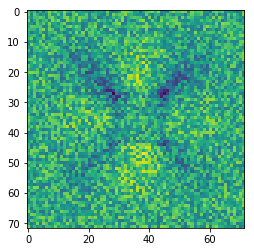

In [327]:
x = model.get_weights()[0]
plt.imshow(x[:,0].reshape(IMAGE_SIZE,IMAGE_SIZE))

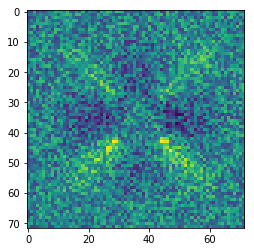

In [328]:
plt.imshow(x[:,1].reshape(IMAGE_SIZE,IMAGE_SIZE))

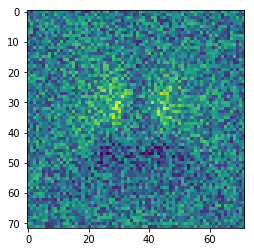

In [329]:
plt.imshow(x[:,2].reshape(IMAGE_SIZE,IMAGE_SIZE))

**Results:**

Each column corresponds to a class, 1: rectangle, 2: disk, 3: triangle

The corners of the rectangle and the ones of the triangle are dark, that means that the model indentified them to classify the figure.

### 5 -  A More Difficult Classification Problem

In [334]:
[X_train, Y_train] = generate_dataset_classification(300, 20, True)
[X_test, Y_test] = generate_test_set_classification()

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [335]:
#Use of the linear model 
model.fit(X_train, np_utils.to_categorical(Y_train), epochs=50)

Epoch 1/50
300/300 [==============================] - 2s 8ms/step - loss: 0.2687 - acc: 0.5233
Epoch 2/50
300/300 [==============================] - 0s 256us/step - loss: 0.2713 - acc: 0.5367
Epoch 3/50
300/300 [==============================] - 0s 229us/step - loss: 0.2913 - acc: 0.4833
Epoch 4/50
300/300 [==============================] - 0s 249us/step - loss: 0.2997 - acc: 0.4800
Epoch 5/50
300/300 [==============================] - 0s 259us/step - loss: 0.2580 - acc: 0.5367
Epoch 6/50
300/300 [==============================] - 0s 249us/step - loss: 0.2702 - acc: 0.5100
Epoch 7/50
300/300 [==============================] - 0s 233us/step - loss: 0.2519 - acc: 0.5667
Epoch 8/50
300/300 [==============================] - 0s 243us/step - loss: 0.2737 - acc: 0.5100
Epoch 9/50
300/300 [==============================] - 0s 263us/step - loss: 0.2555 - acc: 0.5467
Epoch 10/50
300/300 [==============================] - 0s 246us/step - loss: 0.2492 - acc: 0.5567
Epoch 11/50
300/300 [==========

In [336]:
model.evaluate(X_test,Y_test)

300/300 [==============================] - 1s 3ms/step


[0.25376240611076356, 0.52]

In [337]:
from keras.layers import Conv2D, MaxPooling2D, Flatten

#Reshaping the input data of the convolutional layer
X_train = X_train.reshape(X_train.shape[0], IMAGE_SIZE, IMAGE_SIZE, 1)
X_test = X_test.reshape(X_test.shape[0], IMAGE_SIZE, IMAGE_SIZE, 1)

model3 = Sequential()
model3.add(Conv2D(16, (5, 5), activation='relu', input_shape=X_train.shape[1:])) #Convolutional layer
model3.add(MaxPooling2D(pool_size=(2, 2))) #Pooling layer
model3.add(Flatten()) #Output of pooling is Dim 2x2 we want to flatten it 
model3.add(Dense(3, activation = 'softmax')) #Fully connected layer

model3.compile(optimizer="adam",loss='categorical_crossentropy',metrics=['accuracy'])

model3.fit(X_train, np_utils.to_categorical(Y_train), epochs=20, batch_size=32)

Epoch 1/20
300/300 [==============================] - 3s 9ms/step - loss: 1.1073 - acc: 0.4167
Epoch 2/20
300/300 [==============================] - 0s 654us/step - loss: 0.8943 - acc: 0.7167
Epoch 3/20
300/300 [==============================] - 0s 623us/step - loss: 0.7552 - acc: 0.7400
Epoch 4/20
300/300 [==============================] - 0s 638us/step - loss: 0.6491 - acc: 0.8000
Epoch 5/20
300/300 [==============================] - 0s 632us/step - loss: 0.5720 - acc: 0.8267
Epoch 6/20
300/300 [==============================] - 0s 628us/step - loss: 0.5076 - acc: 0.8633
Epoch 7/20
300/300 [==============================] - 0s 602us/step - loss: 0.5275 - acc: 0.8233
Epoch 8/20
300/300 [==============================] - 0s 615us/step - loss: 0.4500 - acc: 0.8533
Epoch 9/20
300/300 [==============================] - 0s 602us/step - loss: 0.3924 - acc: 0.9000
Epoch 10/20
300/300 [==============================] - 0s 618us/step - loss: 0.3676 - acc: 0.9267
Epoch 11/20
300/300 [==========

In [338]:
model3.evaluate(X_test,Y_test)

300/300 [==============================] - 1s 4ms/step


[0.7000392254193624, 0.7299999992052714]

**Results:**

Our linear model does not give a good training accuracy and the test accuracy is even worse.

Using a deep network we can obtain a good train accuracy but our model is overfitting since the test accuracy is significantly lower.

### 6 - A regression problem

In [339]:
[X_train, Y_train] = generate_dataset_regression(300, 20)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [340]:
[X_test, Y_test] = generate_test_set_regression()

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [342]:
from keras.layers import Dropout
model4 = Sequential()

X_train = X_train.reshape(X_train.shape[0], IMAGE_SIZE, IMAGE_SIZE, 1)
X_test = X_test.reshape(X_test.shape[0], IMAGE_SIZE, IMAGE_SIZE, 1)

model4.add(Conv2D(32, (5, 5), activation='relu', input_shape=X_train.shape[1:])) 
model4.add(MaxPooling2D(pool_size=(2, 2))) 
model4.add(Conv2D(32, (5, 5), activation='relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout((0.3)))
model4.add(Flatten()) 
model4.add(Dense(6, activation = 'relu'))

model4.compile(optimizer="adam",loss='mean_squared_error')
model4.fit(X_train, Y_train, epochs=(30))

Epoch 1/30
300/300 [==============================] - 3s 10ms/step - loss: 0.1595
Epoch 2/30
300/300 [==============================] - 0s 1ms/step - loss: 0.0966
Epoch 3/30
300/300 [==============================] - 0s 1ms/step - loss: 0.0806
Epoch 4/30
300/300 [==============================] - 0s 1ms/step - loss: 0.0657
Epoch 5/30
300/300 [==============================] - 0s 1ms/step - loss: 0.0609
Epoch 6/30
300/300 [==============================] - 0s 1ms/step - loss: 0.0564
Epoch 7/30
300/300 [==============================] - 0s 1ms/step - loss: 0.0522
Epoch 8/30
300/300 [==============================] - 0s 1ms/step - loss: 0.0485
Epoch 9/30
300/300 [==============================] - 0s 1ms/step - loss: 0.0447
Epoch 10/30
300/300 [==============================] - 0s 1ms/step - loss: 0.0402
Epoch 11/30
300/300 [==============================] - 0s 1ms/step - loss: 0.0372
Epoch 12/30
300/300 [==============================] - 0s 1ms/step - loss: 0.0341
Epoch 13/30
300/300 [===

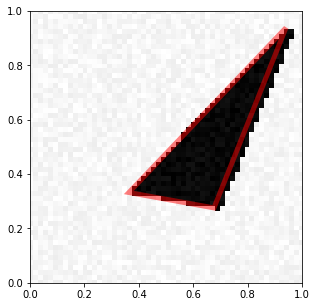

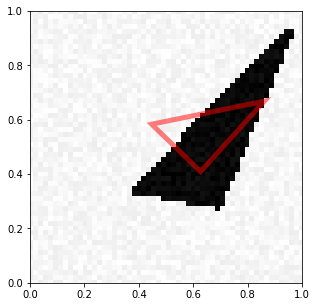

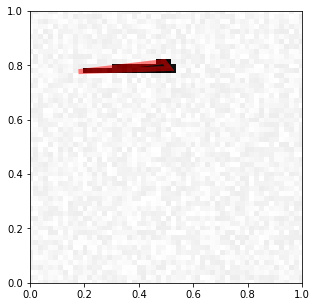

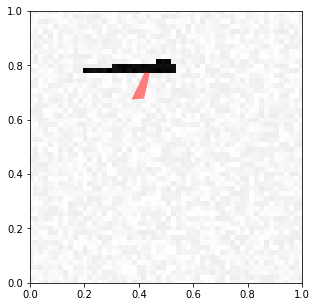

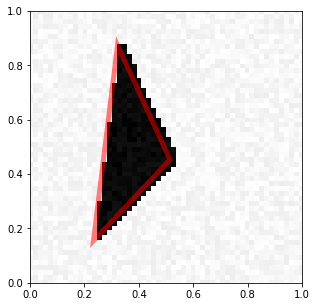

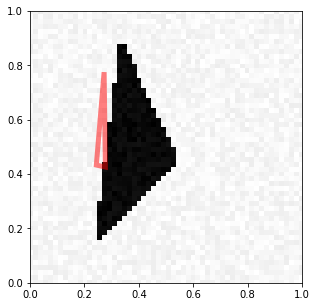

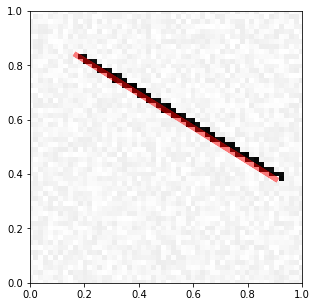

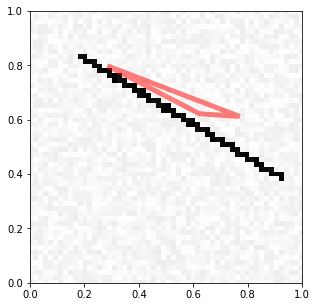

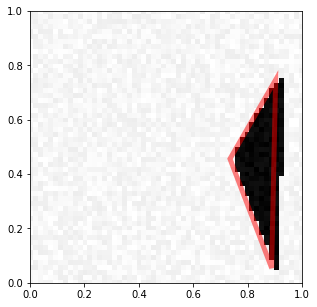

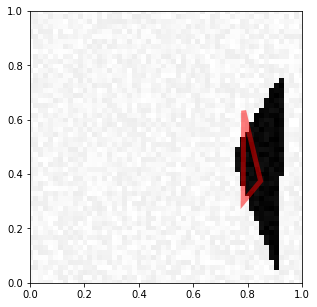

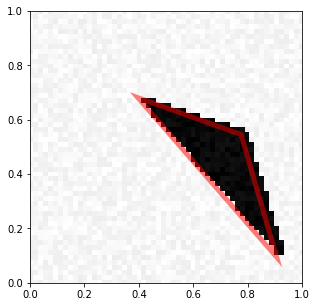

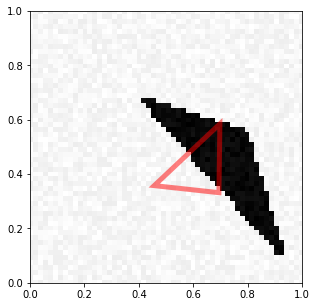

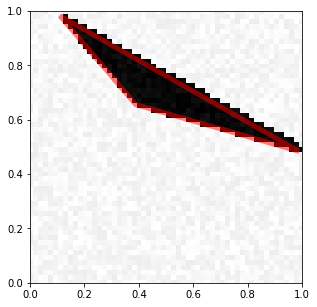

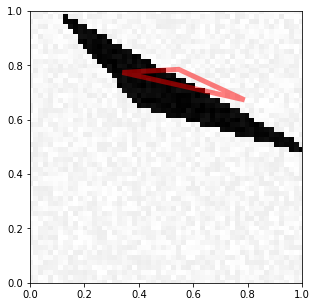

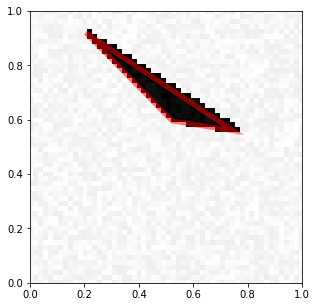

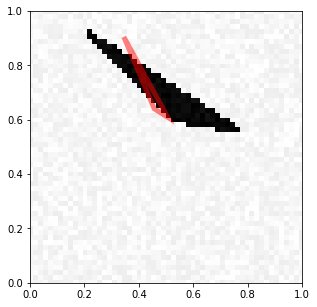

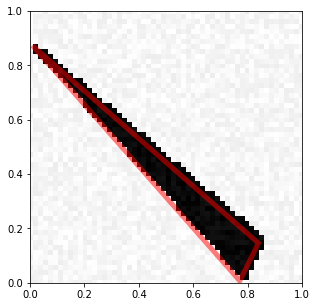

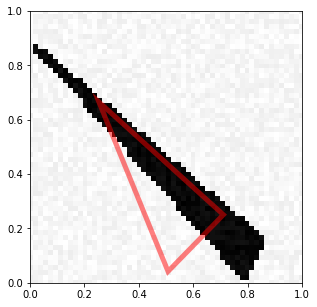

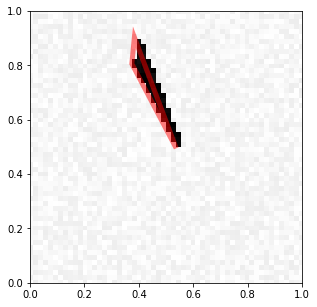

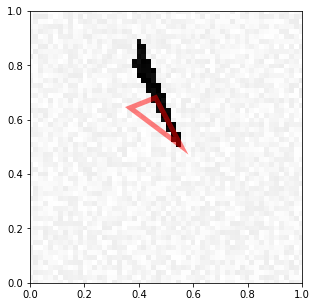

In [343]:
Y_test_pred = model4.predict(X_test)
for i in range(10):
    visualize_prediction(X_test[i], Y_test[i])
    visualize_prediction(X_test[i], Y_test_pred[i])

**Results:**

The model has trouble finding the right location of the vertices. I couldn't find the right architecture to tackle the problem.

### 7 - Image Denoising

In [344]:
import random

In [345]:
def generate_a_triangle_noise(free_location=False):
    noise = random.randint(1,1000) #random noise
    figsize = 1.0
    if free_location:
        U = np.random.random(3)
        V = np.random.random(3)
    else:
        size = (0.3 + 0.7 * np.random.random())*figsize/2
        middle = figsize/2
        U = (middle, middle+size, middle-size)
        V = (middle+size, middle-size, middle-size)
    imdata = generate_a_drawing(figsize, U, V)
    imdata_noise = generate_a_drawing(figsize, U, V, noise)
    return [imdata, imdata_noise]

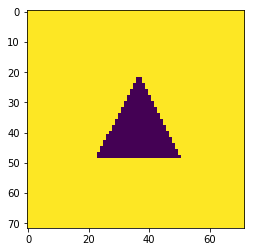

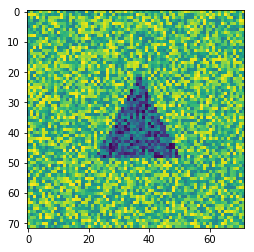

In [348]:
image, image_noise = generate_a_triangle_noise()
plt.imshow(image.reshape(IMAGE_SIZE,IMAGE_SIZE))
plt.show()
plt.imshow(image_noise.reshape(IMAGE_SIZE,IMAGE_SIZE))
plt.show()

In [349]:
train = np.array([generate_a_triangle_noise() for i in range(300)])
test = np.array([generate_a_triangle_noise() for i in range(30)])

X_train = train[:,1,:]
Y_train = train[:,0,:]
X_test = test[:,1,:]
Y_test = test[:,0,:]

In [350]:
model5 = Sequential()

X_train = X_train.reshape(X_train.shape[0], IMAGE_SIZE, IMAGE_SIZE, 1)
X_test = X_test.reshape(X_test.shape[0], IMAGE_SIZE, IMAGE_SIZE, 1)

model5.add(Conv2D(16, (8, 8), activation='relu', input_shape=X_train.shape[1:])) 
model5.add(MaxPooling2D(pool_size=(2, 2))) 
model5.add(Conv2D(16, (8, 8), activation='relu',))
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Conv2D(16, (8, 8), activation='relu',))
model5.add(MaxPooling2D(pool_size=(2, 2)))

model5.add(Flatten()) 
model5.add(Dense(5184, activation = 'relu'))

model5.compile(optimizer="adam",loss='mean_squared_error')
model5.fit(X_train, Y_train, epochs=5)

Epoch 1/5
300/300 [==============================] - 3s 11ms/step - loss: 37104.5390
Epoch 2/5
300/300 [==============================] - 0s 941us/step - loss: 23974.6521
Epoch 3/5
300/300 [==============================] - 0s 941us/step - loss: 22129.1662
Epoch 4/5
300/300 [==============================] - 0s 941us/step - loss: 21067.4277
Epoch 5/5
300/300 [==============================] - 0s 941us/step - loss: 18964.0393
